# Assignment 13
Clara Jones

In [30]:
import pandas as pd

df = pd.read_csv('Electricity Data 2016.csv')
df.head()

,Date,Time,Consumption
0,12/31/2016,0:00,74259.0
1,12/31/2016,0:15,NaN
2,12/31/2016,0:30,72715.0
3,12/31/2016,0:45,NaN
4,12/31/2016,1:00,70283.0


In [31]:
DateDf = df.Date.str.split('/',expand=True)
DateDf.columns = ['Month', 'Day', 'Year']
DateDf.head()

,Month,Day,Year
0,12,31,2016
1,12,31,2016
2,12,31,2016
3,12,31,2016
4,12,31,2016


In [32]:
TimeDf = df.Time.str.split(':',expand=True)
TimeDf.columns = ['Hour','Min']
TimeDf.head()

,Hour,Min
0,0,00
1,0,15
2,0,30
3,0,45
4,1,00


In [33]:
BM = (TimeDf.Min == '15') | (TimeDf.Min == '45')

df = df[~BM]
df = df.reset_index().drop(columns=['index'])

DateDf = DateDf[~BM]
DateDf = DateDf.reset_index().drop(columns=['index'])

TimeDf = TimeDf[~BM]
TimeDf = TimeDf.reset_index().drop(columns=['index'])
TimeDf

,Hour,Min
0,0,00
1,0,30
2,1,00
3,1,30
4,2,00
5,2,30
6,3,00
7,3,30
8,4,00
9,4,30


The number of rows is:  17568
The number of missing values is:  0


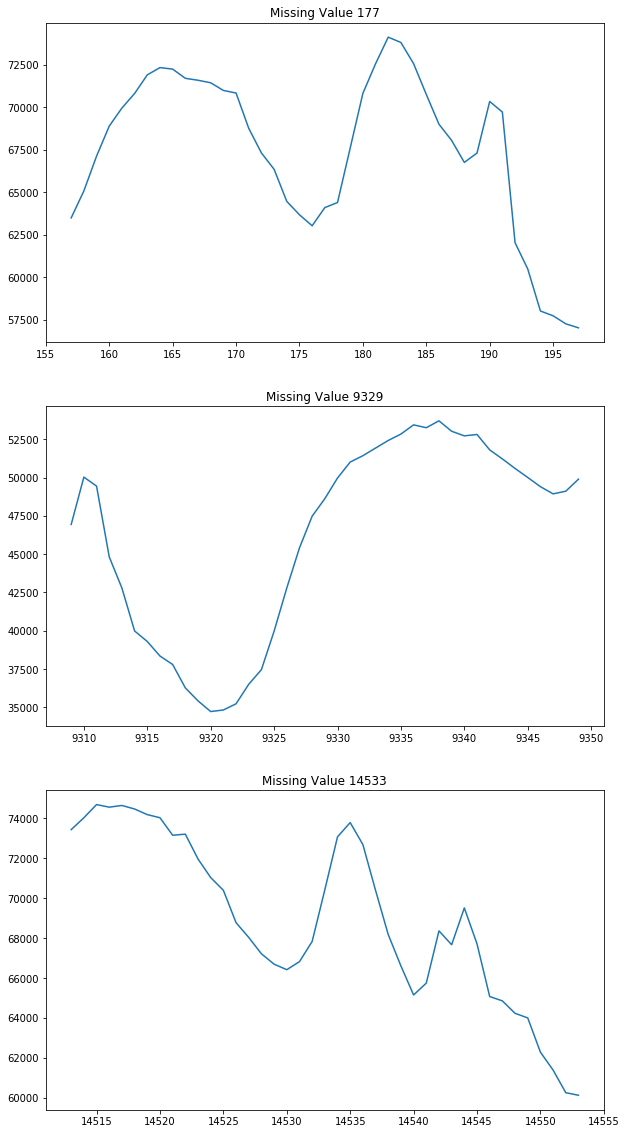

In [45]:
BM = df.Consumption.isnull()
MSdf = df[BM]

for i,row in MSdf.iterrows():
    Previous = df.loc[i-1].Consumption
    TwoPrev = df.loc[i-2].Consumption
    Next = df.loc[i+1].Consumption
    TwoNext = df.loc[i+2].Consumption
    
    df.at[i, 'Consumption'] = (TwoPrev + 4*Previous + 4*Next + TwoNext)/10
    
print('The number of rows is: ', len(df))
print('The number of missing values is: ', df.Consumption.isnull().astype(int).sum())

plt.figure(figsize=(10,20))

NMiss = len(MSdf)

index = 0;
for i,row in MSdf.iterrows():
    index = index + 1
    plt.subplot(NMiss,1,index)
    plt.plot(df.Consumption.loc[i-20:i+20])
    plt.title('Missing Value ' + str(i))

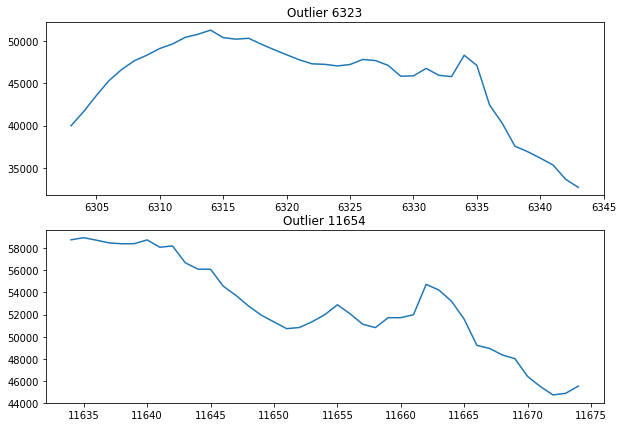

In [54]:
BM = df.Consumption>200000
OutlierDf = df[BM]

for i,row in OutlierDf.iterrows():
    Previous = df.loc[i-1].Consumption
    TwoPrev = df.loc[i-2].Consumption
    Next = df.loc[i+1].Consumption
    TwoNext = df.loc[i+2].Consumption
    
    df.at[i, 'Consumption'] = (TwoPrev + 4*Previous + 4*Next + TwoNext)/10
    
plt.figure(figsize=(10,7))

NumOutliers = len(OutlierDf)

index = 0;
for i,row in OutlierDf.iterrows():
    index = index + 1
    plt.subplot(NumOutliers,1,index)
    plt.plot(df.Consumption.loc[i-20:i+20])
    plt.title('Outlier ' + str(i))

In [55]:
import datetime
def WeekDayRetrieve(row):
    Year = int(row['Year'])
    Month = int(row['Month'])
    Day = int(row['Day'])
    TheDate = datetime.date(Year, Month, Day).weekday()
    if (TheDate==0):
        Weekday = 'Sun'
    if (TheDate==1):
        Weekday = 'Mon'
    if (TheDate==2):
        Weekday = 'Tue'
    if (TheDate==3):
        Weekday = 'Wed'
    if (TheDate==4):
        Weekday = 'Thu'
    if (TheDate==5):
        Weekday = 'Fri'
    if (TheDate==6):
        Weekday = 'Sat'
        
    return Weekday

In [56]:
WeekDaySeries = DateDf.apply(WeekDayRetrieve, axis=1)
WeekDaySeries.head()

0    Fri
1    Fri
2    Fri
3    Fri
4    Fri
dtype: object

In [57]:
dfToJoin = pd.DataFrame(WeekDaySeries)
dfToJoin.columns = ['Weekday']
df1 = DateDf.join(dfToJoin)
df2 = df1.join(df).drop(columns=['Month','Day','Year'])
df3 = df2.join(TimeDf)
df3.groupby(['Weekday','Date']).mean()
df3

,Weekday,Date,Time,Consumption,Hour,Min
0,Fri,12/31/2016,0:00,74259.0,0,00
1,Fri,12/31/2016,0:30,72715.0,0,30
2,Fri,12/31/2016,1:00,70283.0,1,00
3,Fri,12/31/2016,1:30,69981.0,1,30
4,Fri,12/31/2016,2:00,69389.0,2,00
5,Fri,12/31/2016,2:30,68734.0,2,30
6,Fri,12/31/2016,3:00,66735.0,3,00
7,Fri,12/31/2016,3:30,65493.0,3,30
8,Fri,12/31/2016,4:00,64402.0,4,00
9,Fri,12/31/2016,4:30,63964.0,4,30


In [58]:
new_df2 = pd.pivot_table(df3,values='Consumption',index=['Date','Weekday'],columns='Time')
new_df2.head()

,Time,0:00,0:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,...,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30
Date,Weekday,,,,,,,,,,,,,,,,,,,,,
1/1/2016,Thu,60165.0,58887.0,50517.0,51398.0,52328.0,53468.0,54333.0,55627.0,56743.0,55446.0,...,48657.0,48865.0,48743.0,49216.0,49108.0,49339.0,49548.0,49061.0,48939.0,49651.0
1/10/2016,Sat,61786.0,60068.0,58570.0,59867.0,60757.0,61677.0,62335.0,63158.0,64066.0,62054.0,...,49801.0,50281.0,50549.0,51283.0,51615.0,52596.0,53505.0,54236.0,55111.0,56960.0
1/11/2016,Sun,61961.0,60110.0,71535.0,71466.0,71657.0,71933.0,72403.0,71868.0,72166.0,71411.0,...,52886.0,55148.0,57197.0,61371.0,65049.0,68670.0,70731.0,71168.0,71039.0,71516.0
1/12/2016,Mon,66641.0,64723.0,74212.0,74008.0,73783.0,73998.0,74290.0,73393.0,73667.0,72598.0,...,57200.0,59282.0,61213.0,65157.0,68909.0,72504.0,74625.0,74848.0,74408.0,74472.0
1/13/2016,Tue,69606.0,67584.0,78030.0,77412.0,77014.0,77113.0,76878.0,76197.0,76063.0,74938.0,...,60436.0,62626.0,64658.0,68327.0,71857.0,75738.0,77839.0,78681.0,78313.0,78339.0


In [59]:
column_order = df.Time.iloc[0:48]

In [60]:
new_df2 = new_df2.reindex(column_order,axis=1)
new_df2.head()

,Time,0:00,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
Date,Weekday,,,,,,,,,,,,,,,,,,,,,
1/1/2016,Thu,60165.0,58887.0,56678.0,56460.0,55780.0,55233.0,53160.0,51648.0,50207.0,49345.0,...,59254.0,59488.0,59008.0,58173.0,57091.0,56059.0,55107.0,55609.0,58199.0,57539.0
1/10/2016,Sat,61786.0,60068.0,57423.0,56843.0,56042.0,55220.0,53035.0,51924.0,50673.0,50220.0,...,65457.0,65537.0,65070.0,63577.0,62325.0,60815.0,59700.0,59958.0,62532.0,62038.0
1/11/2016,Sun,61961.0,60110.0,57711.0,57453.0,56806.0,56251.0,54365.0,53309.0,52291.0,52377.0,...,76731.0,75789.0,73696.0,71482.0,69272.0,67085.0,65311.0,65505.0,67858.0,66859.0
1/12/2016,Mon,66641.0,64723.0,61806.0,61335.0,60751.0,60451.0,58694.0,57835.0,56893.0,56904.0,...,79504.0,78525.0,76709.0,74326.0,71896.0,69860.0,68068.0,68258.0,70680.0,69778.0
1/13/2016,Tue,69606.0,67584.0,64987.0,64512.0,63909.0,63577.0,61802.0,60776.0,59910.0,60034.0,...,80718.0,79736.0,77730.0,75247.0,73042.0,71130.0,69546.0,69667.0,71991.0,71127.0


In [61]:
new_df2.reset_index(inplace=True)
new_df2

Time,Date,Weekday,0:00,0:30,1:00,1:30,2:00,2:30,3:00,3:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
0,1/1/2016,Thu,60165.0,58887.0,56678.0,56460.0,55780.0,55233.0,53160.0,51648.0,...,59254.0,59488.0,59008.0,58173.0,57091.0,56059.0,55107.0,55609.0,58199.0,57539.0
1,1/10/2016,Sat,61786.0,60068.0,57423.0,56843.0,56042.0,55220.0,53035.0,51924.0,...,65457.0,65537.0,65070.0,63577.0,62325.0,60815.0,59700.0,59958.0,62532.0,62038.0
2,1/11/2016,Sun,61961.0,60110.0,57711.0,57453.0,56806.0,56251.0,54365.0,53309.0,...,76731.0,75789.0,73696.0,71482.0,69272.0,67085.0,65311.0,65505.0,67858.0,66859.0
3,1/12/2016,Mon,66641.0,64723.0,61806.0,61335.0,60751.0,60451.0,58694.0,57835.0,...,79504.0,78525.0,76709.0,74326.0,71896.0,69860.0,68068.0,68258.0,70680.0,69778.0
4,1/13/2016,Tue,69606.0,67584.0,64987.0,64512.0,63909.0,63577.0,61802.0,60776.0,...,80718.0,79736.0,77730.0,75247.0,73042.0,71130.0,69546.0,69667.0,71991.0,71127.0
5,1/14/2016,Wed,71046.0,69032.0,66623.0,65937.0,65483.0,64856.0,63096.0,62191.0,...,81428.0,80469.0,78389.0,76406.0,74109.0,71947.0,70386.0,70537.0,73090.0,72270.0
6,1/15/2016,Thu,72103.0,70414.0,67820.0,67640.0,67063.0,66755.0,64915.0,64240.0,...,82711.0,81733.0,80231.0,78051.0,75921.0,74237.0,72685.0,73183.0,75700.0,74857.0
7,1/16/2016,Fri,74593.0,72675.0,69738.0,69259.0,68460.0,67886.0,65928.0,64756.0,...,76181.0,75862.0,74516.0,73105.0,71701.0,70283.0,69358.0,70363.0,73540.0,73086.0
8,1/17/2016,Sat,73303.0,71806.0,69263.0,68665.0,67917.0,67314.0,65259.0,63807.0,...,75108.0,75377.0,74928.0,73577.0,72624.0,71124.0,70044.0,70611.0,73554.0,72649.0
9,1/18/2016,Sun,72675.0,71101.0,68777.0,68732.0,68373.0,68258.0,66506.0,65532.0,...,88731.0,87320.0,84924.0,82629.0,80030.0,77802.0,75819.0,76056.0,78507.0,77262.0


In [63]:
Months = new_df2.apply(lambda r:r.Date[0:r.Date.find('/')],axis=1)

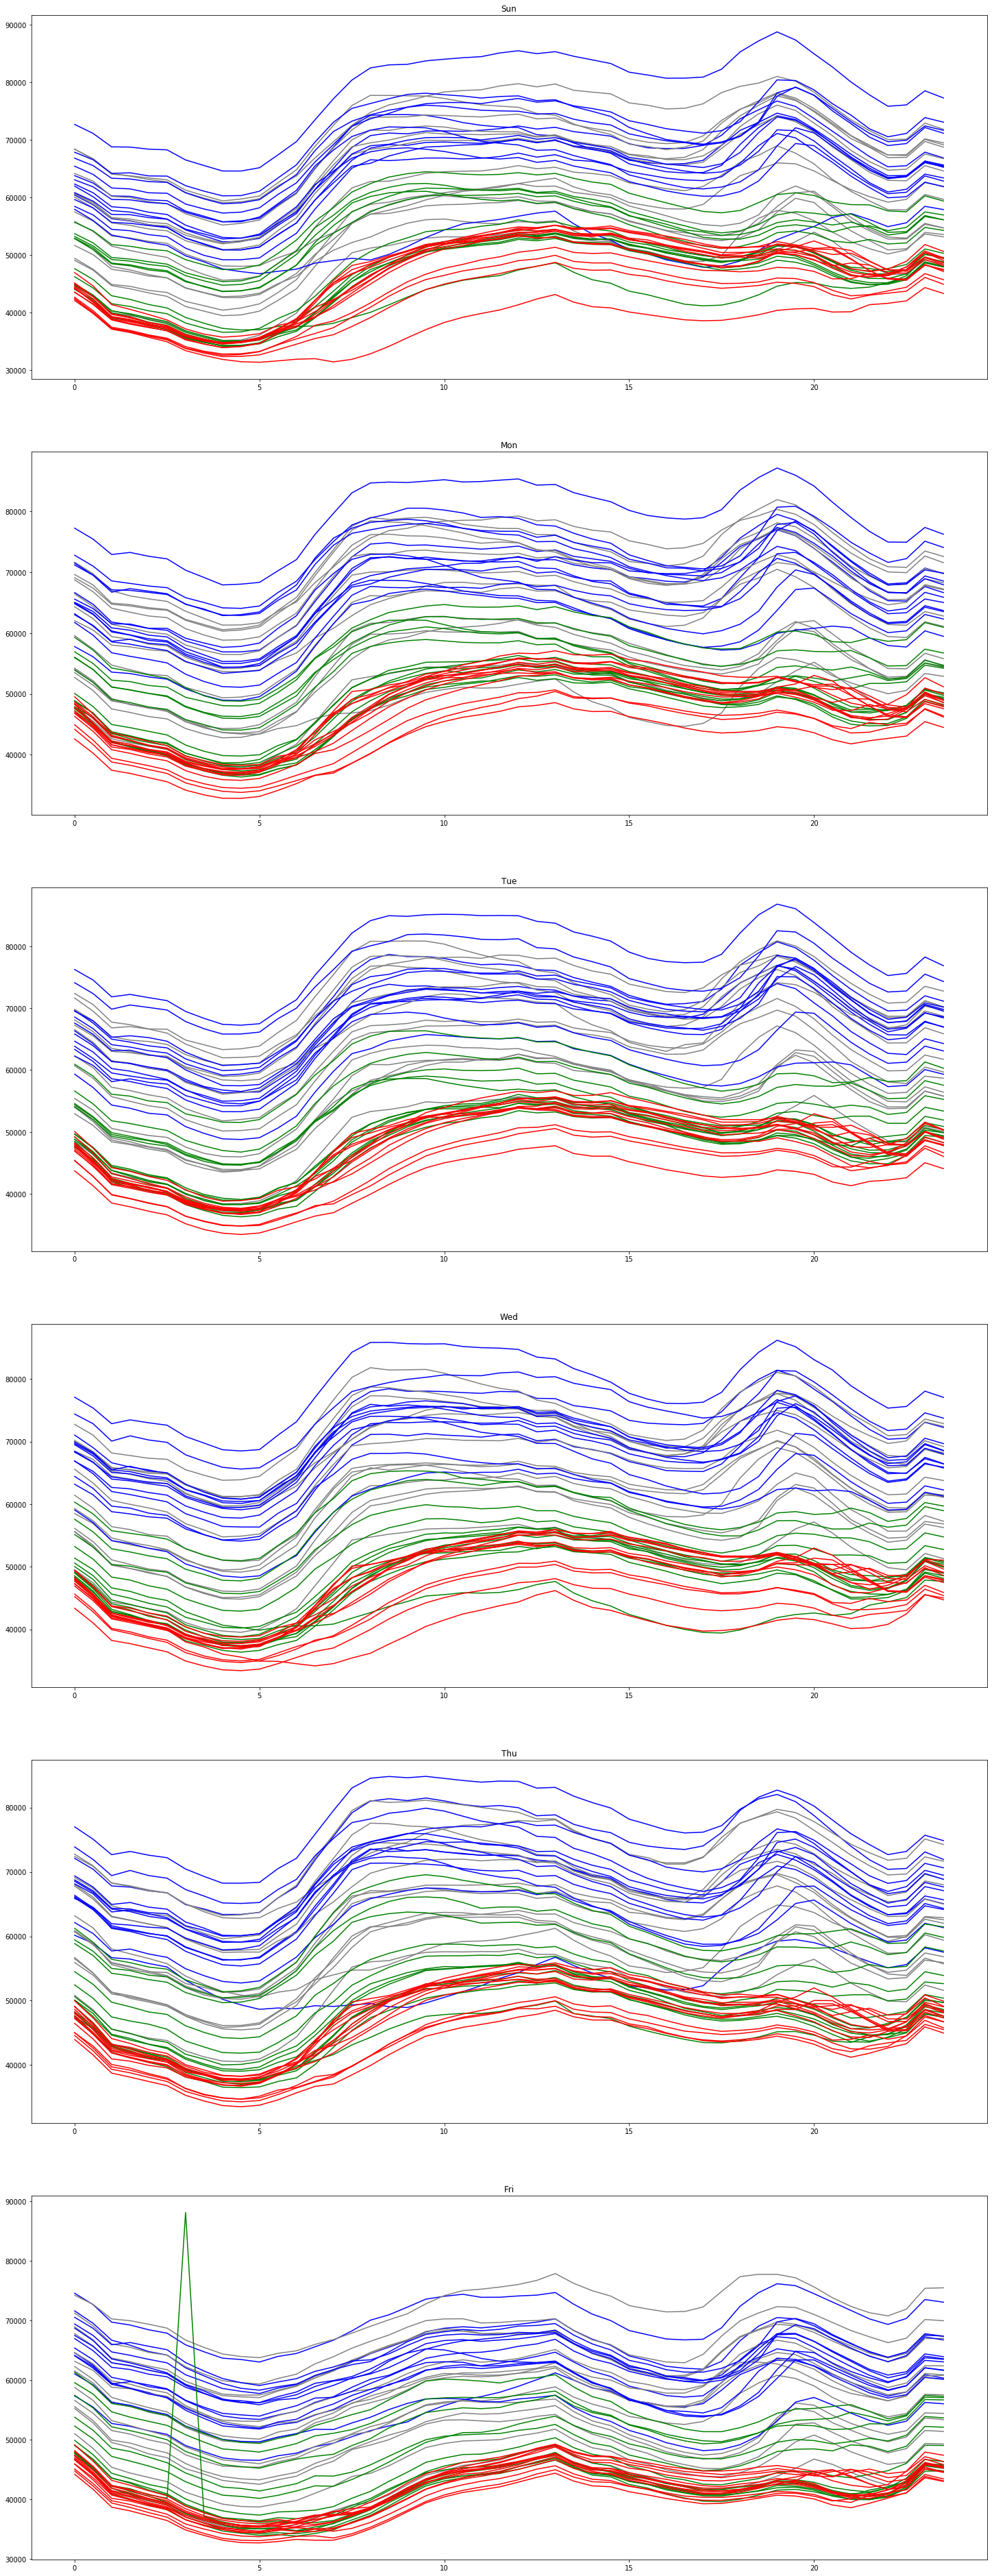

In [65]:
import numpy as np
import matplotlib.pyplot as plt
x_axis = np.arange(0,24,0.5)

WeekdayPoss = ['Sun','Mon','Tue','Wed','Thu','Fri']
SeasonColors = ['b','b','b','g','g','g','r','r','r','grey','grey','grey']


plt.figure(figsize=(25,80))

sub_plot_index = 0
for day in WeekdayPoss:
    sub_plot_index = sub_plot_index + 1
    BM = new_df2.Weekday == day
    wdf = new_df2[BM]
    
    plt.subplot(7,1,sub_plot_index)
    
    for i,row in wdf.iterrows():
        Month = Months.loc[i]
        clr = SeasonColors[int(Month)-1]
        plt.plot(x_axis, row.loc['0:00':'23:30'], color=clr)
    plt.title(day)